# Project: Wrangle and Analyze Data


- [Introduction](#Introduction)
- [Gather](#Gather)
    - [From Twitter archive](#From_Twitter_archive)
    - [From URL](#From_URL)
    - [From Tweepy](#From_Tweepy)
- [Assess](#Assess)
    - [Assess Summary](#Assess_Summary)
- [Clean](#Clean)
    - [Quality](#Clean_Quality)
    - [Tidiness](#Clean_Tidiness)
- [Store Data](#store)
- [Three Insights and One Visualization](#insights)


<a id='Introduction'></a>
## Introduction

The goal of this project is to wrangle and analyze and create visualizations for the data from the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.



<a id='Gather'></a>
## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

<a id='From_Twitter_archive'></a>
#### Fetching data from The WeRateDogs Twitter archive

In [2]:
#Fetch data from csv
df_ratedogs = pd.read_csv('twitter-archive-enhanced.csv')

<a id='From_URL'></a>
#### Downloading image predictions file from URL provided

In [3]:
#Downloading the tweets image prediction file from Udacity's servers programmatically using the Requests library .

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

#### Fetching data from downloaded image prediction file

In [4]:
df_imagepredict = pd.read_csv('image-predictions.tsv', sep='\t')

<a id='From_Tweepy'></a>
#### Saving data from json file obtained from Twitter API

In [5]:
#Store each tweet's JSON data using Python's Tweepy library in a file called tweet_json.txt file.
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_ratedogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
18

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

#### Reading the json file and fetching data to Dictionary and then to a DataFrame

In [6]:
# List of dictionaries to build file by file and later convert to a DataFrame
json_dict = []
#all_content = ''
df_json = []

with open('tweet_json.txt', 'r') as json_file:
    line = json_file.readline()
    
    while line:
        x = json.loads(line)
        tweet_id = x['id_str']
        retweet_count = x['retweet_count']
        favorite_count= x['favorite_count']
        retweeted = x['retweeted']
        favorited = x['favorited']
         # Append to list of dictionaries
        json_dict.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                         'retweeted': retweeted,
                         'favorited': favorited})
        line = json_file.readline()
        
        df_json.append(json_dict)
        
df_json = pd.DataFrame(json_dict, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'retweeted', 'favorited'])

<a id='Assess'></a>
## Access

In [7]:
df_ratedogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_imagepredict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
df_json

,tweet_id,retweet_count,favorite_count,retweeted,favorited
0,892420643555336193,7677,36061,False,False
1,892177421306343426,5677,31103,False,False
2,891815181378084864,3763,23416,False,False
3,891689557279858688,7851,39332,False,False
4,891327558926688256,8449,37573,False,False
5,891087950875897856,2835,18932,False,False
6,890971913173991426,1844,11006,False,False
7,890729181411237888,17132,60745,False,False
8,890609185150312448,3900,26045,False,False
9,890240255349198849,6660,29779,False,False


In [10]:
df_ratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_imagepredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
retweeted         2331 non-null bool
favorited         2331 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 59.3+ KB


In [13]:
#Check for duplicate
df_ratedogs.duplicated().sum()

0

In [14]:
#Check for duplicate
df_imagepredict.duplicated().sum()

0

In [15]:
#Check for duplicate
df_json.duplicated().sum()

0

- No Duplicates in all three dataframes

In [16]:
#Check df_ratedogs where extended_url is missing and it is a retweet or a reply

(df_ratedogs.expanded_urls.isna() & (df_ratedogs.in_reply_to_status_id.notnull() | df_ratedogs.retweeted_status_id.notnull())).sum()

56

In [17]:
#56 tweets out of 59 tweets are retweet or reply.
#Check 3 tweets with missin url

df_ratedogs[(df_ratedogs.expanded_urls.isna()
& (df_ratedogs.in_reply_to_status_id.isna()
& df_ratedogs.retweeted_status_id.isna()))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [18]:
#Check if above tweets are present in Image prediction on json data

df_imagepredict.query('tweet_id in (828361771580813312,785515384317313025,696518437233913856)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
df_json.query('tweet_id in (828361771580813312,785515384317313025,696518437233913856)')

,tweet_id,retweet_count,favorite_count,retweeted,favorited


- The other 3 expandedurls are not present in image prediction and json data

In [20]:
#name column has some irrelevant names, The data is picked from text column.
#The third word from text column and mostly all are lowercase.
df_ratedogs[['name','text']].tail(25)

,name,text
2331,None,Here we have a mixed Asiago from the Galápagos...
2332,None,Look at this jokester thinking seat belt laws ...
2333,an,This is an extremely rare horned Parthenon. No...
2334,a,This is a funny dog. Weird toes. Won't come do...
2335,an,This is an Albanian 3 1/2 legged Episcopalian...
2336,None,Can take selfies 11/10 https://t.co/ws2AMaNwPW
2337,None,Very concerned about fellow dog trapped in com...
2338,None,Not familiar with this breed. No tail (weird)....
2339,None,Oh my. Here you are seeing an Adobe Setter giv...
2340,None,Can stand on stump for what seems like a while...


In [21]:
#irrelevant data in name column
df_ratedogs[df_ratedogs['name'].str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
getting          2
mad              2
not              2
actually         2
such             1
by               1
incredibly       1
space            1
light            1
my               1
this             1
all              1
officially       1
old              1
infuriating      1
unacceptable     1
his              1
life             1
Name: name, dtype: int64

In [22]:
# name column with 'None'
df_ratedogs[df_ratedogs['name'] == 'None'].name.value_counts()

None    745
Name: name, dtype: int64

In [23]:
#values of source coulmn
df_ratedogs.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
#tweet ids not present in Image prediction table
df_ratedogs[~df_ratedogs.tweet_id.isin(df_imagepredict.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None


In [25]:
#check for above condition for random tweet_id's
df_imagepredict.query('tweet_id in (667070482143944705,886267009285017600,668587383441514497,881633300179243008)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
df_ratedogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
df_ratedogs[df_ratedogs.rating_numerator > 25].rating_numerator.count()

23

In [28]:
df_ratedogs[df_ratedogs.rating_denominator > 10].rating_denominator.count()

20

In [29]:
df_ratedogs[df_ratedogs.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


- There are three rows with rating_denominator < 10.
- tweet_id - 835246439529840640 is a reply that will be dropped.
- tweet_id - 810984652412424192 can be dropped because it is not used for rating, but provides a link for the gofundme page.
- tweet_id - 666287406224695296 can be updated manually with rating in the text column.

In [30]:
df_ratedogs[df_ratedogs.rating_numerator < 10].rating_numerator.count()

440

In [31]:
#Check dogs where images could not be predicted
df_imagepredict[~df_imagepredict.p1_dog & \
               ~df_imagepredict.p2_dog & \
               ~df_imagepredict.p3_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [32]:
df_json.describe()

,retweet_count,favorite_count
count,2331.000000,2331.000000
mean,2694.166023,7530.664522
std,4555.146127,11690.160213
min,1.000000,0.000000
25%,545.500000,1314.000000
50%,1262.000000,3274.000000
75%,3133.000000,9221.500000
max,77495.000000,155538.000000


In [33]:
df_json[df_json.favorite_count >= df_json.favorite_count.max()]

,tweet_id,retweet_count,favorite_count,retweeted,favorited
1015,744234799360020481,77495,155538,False,False


In [34]:
df_json[df_json.retweet_count >= df_json.retweet_count.max()]

,tweet_id,retweet_count,favorite_count,retweeted,favorited
1015,744234799360020481,77495,155538,False,False


<a id='Assess_Summary'></a>
### Assess Summary
### Quality

#### df_ratedogs
- Columns in_reply_to_user_id and retweeted_status_timestamp should be of type datetime.
- There are 181 retweets.
- There are 78 replies.
- 59 tweets out of 2356 have missing expanded_urls
    - 56 tweets out of 59 tweets are retweets or replies.
    - Update the expandedurls for the remaining 3 manually.
    - The 3 missing expandedurls are not present in either image predict or json data.
- Investigate name columns that have some irrelevant names such as a,an,very,mad. The data looks to be extracted from the text column.
    - There are 109 columns of this kind. Most of the dog types are available in the text column but not names, So they can be updated with 'None'.
- Some of the name column values are ‘None’. The text field does not contain names of dogs either.
    - There are 745 such columns. Cleaning cannot be done as information is not available.
- 281 tweet ids are not present in df_imagepredict
- The rating_denominator can be dropped as it should always be 10.
    - The rating_denominator > 10 are for pictures with multiple dogs.
    - There are three rows with rating_denominator < 10.
        - tweet_id - 835246439529840640 is a reply that will be dropped.
        - tweet_id - 810984652412424192 can be dropped because it is not used for rating, but provides a link for the gofundme page.
        - tweet_id - 666287406224695296 can be updated manually with rating in text column.
- the max values for rating_numerator and rating_denominator look very high(1776 and 170 respectively)


#### df_imagepredict

- There are 324 rows where the image of the dog was not predicted(p1_dog, p2_dog and p3_dog are all False).
    - These rows can be retained for analysis on prdiction rates.


#### df_json

- The max number of retweets is 77552 and the max number of favorite_count is 155631.
    - Both the max values belong to the same tweet_id.


### Tidiness

- The columns related to retweets and replies can be dropped(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
- The source column can be cleaned and given smaller data for readability(Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck)
- The various stages of dogs can be made into a single column.
- The values for columns 'retweeted' and 'favorited' in df_json is always false.
- df_json can be combined with df_ratedogs data

<a id='Clean'></a>
## Clean

In [35]:
#take copies of the gathered data(weratedogs archive, image predicions and json data)
df_ratedogs_copy = df_ratedogs.copy()
df_imagepredict_copy = df_imagepredict.copy()
df_json_copy = df_json.copy()

<a id='Clean_Quality'></a>
### Quality

### Define

#### Columns in_reply_to_user_id and retweeted_status_timestamp should be of type datetime.

- Use pd.to_datetime() to convert columns to datetime datatype.

### Code

In [36]:
# Columns in_reply_to_user_id and retweeted_status_timestamp should be of type datetime.

df_ratedogs_copy['in_reply_to_user_id'] = pd.to_datetime(df_ratedogs_copy['in_reply_to_user_id'])
df_ratedogs_copy['retweeted_status_timestamp'] = pd.to_datetime(df_ratedogs_copy['retweeted_status_timestamp'])


### Test

In [37]:
df_ratedogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null datetime64[ns]
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime6

### Define

##### Assesment Query
- We want only want original ratings (no retweets) that have images.The below data will not be required.
- There are 181 retweets.
- There are 78 replies.
- 281 tweet id's are not present in df_imagepredict
- 59 tweets out of 2356 have missing expanded_urls
    - 56 tweets out of 59 tweets are retweets or replies.
    - Update the expandedurls for the remaining 3 manually.
    - The 3 missing expandedurls are not present in either image predict or json data.
    
##### Solution
- Delete retweets and replies.
- Delete from df_rate_dogs where image prediction is not available
- Delete from df_rate_dogs with no expanded_urls



Note:The 3 tweets with missing expandedurls will be deleted when we are cleaning tweet id's not present in df_imagepredict

### Code

In [38]:
#Delete retweets i.e., rows where retweeted_status_id is not null
df_ratedogs_copy = df_ratedogs_copy[df_ratedogs_copy['retweeted_status_id'].isnull()]

In [39]:
#Delete replies to tweets i.e., rows where in_reply_to_user_id is not null
df_ratedogs_copy = df_ratedogs_copy[df_ratedogs_copy['in_reply_to_user_id'].isnull()]

In [40]:
#Delete rows with no images in image predict data
#Note: The rows deleted will be lesser than 281, because retweets have already been deleted
df_ratedogs_copy = df_ratedogs_copy[df_ratedogs_copy.tweet_id.isin(df_imagepredict_copy.tweet_id)]

### Test

In [41]:
#Check if retweets are deleted

df_ratedogs_copy[~df_ratedogs_copy['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
#Check if replies are deleted

df_ratedogs_copy[~df_ratedogs_copy['in_reply_to_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
#Check tweets that are not in image prediction data are deleted 

df_ratedogs_copy[~df_ratedogs_copy.tweet_id.isin(df_imagepredict_copy.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
#Check if there are missing expandedurls

df_ratedogs_copy[(df_ratedogs_copy.expanded_urls.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

##### Assesment Query
- Investigate name columns that have some irrelevant names such as a,an,very,mad. The data looks to be extracted from the text column.
    - There are 109 columns of this kind. Most of the dog types are available in the text column but not names, So they can be updated with 'None'.
    
##### Solution
- Update irrelevant names in df_ratedogs to 'None'

### Code

In [45]:
irr_names = df_ratedogs_copy['name'].str.islower()
df_ratedogs_copy.loc[irr_names, 'name'] = "None"

### Test

In [46]:
df_ratedogs_copy['name'].str.islower().sum()

0

### Define

##### Assessment Query
- The rating_denominator should always be 10.
    - The rating_denominator > 10 are for pictures with multiple dogs.
    - There are three rows with rating_denominator < 10. 
        - tweet_id - 835246439529840640 is a reply that will be dropped.
        - tweet_id - 810984652412424192 can be dropped because it is not used for rating, but provides a link for the gofundme page.
        - tweet_id - 666287406224695296 can be updated manually with rating in the text column.
- Some rating numerators have very high value.
- the max values for rating_numerator and rating_denominator look very high(1776 and 170 respectively)

##### Solution
- Delete row with tweet_id - 835246439529840640.
- Delete row with tweet_id - 810984652412424192 
- Manually update tweet_id - 666287406224695296 with rating in text column.
- The rating_denominators for tweets with multiple dog images are > 10. So, check for rows with rating_denominator equal to 10 and rating numerators > 25.
- Check validity of rating_numerator and rating_denominator with values 1776 and 170 respectively.

### Code

In [47]:
#Check for columns with rating_denominator less than 10

df_ratedogs_copy[df_ratedogs_copy.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaT,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaT,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,1,2,None,None,None,None,None


In [48]:
#update row manually with rating found in text
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 666287406224695296), 'rating_numerator'] = 9
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 666287406224695296), 'rating_denominator'] = 10

In [49]:
df_ratedogs_copy = df_ratedogs_copy[df_ratedogs_copy.tweet_id != 810984652412424192]

In [50]:
df_ratedogs_copy[df_ratedogs_copy.rating_denominator == df_ratedogs_copy.rating_denominator.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaT,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None


- The row with max value of rating_denominator also has images with multiple dogs. So this is a valid value.

### Test

In [51]:
df_ratedogs_copy[df_ratedogs_copy.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
# Check for values of rating_numerator is > 25
# Since rating_denominator > 10 implies for pictures with multiple dogs in it,
# we have to consider columns with rating_denominator equal to 10.

df_ratedogs_copy[(df_ratedogs_copy.rating_numerator > 25)
& (df_ratedogs_copy.rating_denominator == 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaT,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaT,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaT,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaT,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaT,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [53]:
#Values of rating_numerator 1776 and 420 are valid values.
#The others have decimal number as a rating_numerator.
#So the rating numerator shoud be converted to float and the respective values need to be updated manually.

df_ratedogs_copy['rating_numerator'] = df_ratedogs_copy['rating_numerator'].astype(float)

In [54]:
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75

### Test

In [55]:
df_ratedogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1970 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null datetime64[ns]
timestamp                     1970 non-null object
source                        1970 non-null object
text                          1970 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1970 non-null object
rating_numerator              1970 non-null float64
rating_denominator            1970 non-null int64
name                          1970 non-null object
doggo                         1970 non-null object
floofer                       1970 non-null object
pupper                        1970 non-null object
puppo                         1970 non-null object
dtypes: datetime64[ns](

In [56]:
df_ratedogs_copy[(df_ratedogs_copy.rating_numerator > 25)
& (df_ratedogs_copy.rating_denominator == 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaT,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None
2074,670842764863651840,NaN,NaT,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,None,None,None,None


### Define

##### Assessment Query
- The max number of retweets is 77552 and the max number of favorite_count is 155631.
    - Both the max values belong to the same tweet_id.
    
##### Solution
- Validate row with max retweets and max favorite counts.

### Code

In [57]:
df_json_copy[df_json_copy.retweet_count == df_json_copy.retweet_count.max()]

,tweet_id,retweet_count,favorite_count,retweeted,favorited
1015,744234799360020481,77495,155538,False,False


In [58]:
df_json_copy[df_json_copy.favorite_count == df_json_copy.favorite_count.max()]

,tweet_id,retweet_count,favorite_count,retweeted,favorited
1015,744234799360020481,77495,155538,False,False


- Both the max values are valid data

<a id='Clean_Tidiness'></a>
### Tidiness

### Define

- The columns related to retweets and replies can be dropped(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

### Code

In [59]:
df_ratedogs_copy = df_ratedogs_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [60]:
df_ratedogs_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


### Define

- The source column can be cleaned and given smaller data for readability(Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck)

### Code

In [61]:
df_ratedogs_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1931
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [62]:
df_ratedogs_copy.loc[(df_ratedogs_copy['source'].str.contains('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>')), 'source'] = 'Twitter for iPhone'
df_ratedogs_copy.loc[(df_ratedogs_copy['source'].str.contains('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>')), 'source'] = 'Vine - Make a Scene'
df_ratedogs_copy.loc[(df_ratedogs_copy['source'].str.contains('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>')), 'source'] = 'Twitter Web Client'
df_ratedogs_copy.loc[(df_ratedogs_copy['source'].str.contains('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>')), 'source'] = 'TweetDeck'

### Test

In [63]:
df_ratedogs_copy.source.value_counts()

Twitter for iPhone    1931
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [64]:
df_ratedogs_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


### Define

##### Assesment Query
- The various stages of dogs can be made into a single column.

##### Solution
- Check and resolve rows with multiple dog types.
- Create new column dog_types
- Drop columns for 'floofer','puppo','doggo','pupper' from df_dog_rates_copy

### Code

In [65]:
df_ratedogs_copy[(df_ratedogs_copy.doggo == 'doggo')
& ((df_ratedogs_copy.floofer == 'floofer') | (df_ratedogs_copy.pupper == 'pupper') | (df_ratedogs_copy.puppo == 'puppo'))]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28 +0000,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,None,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,Twitter for iPhone,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10,None,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


- There are 10 columns with multiple dog types.
- Check for the text column and update data.

In [66]:
df_ratedogs_copy[(df_ratedogs_copy.doggo == 'doggo') & ((df_ratedogs_copy.floofer == 'floofer') | (df_ratedogs_copy.pupper == 'pupper') | (df_ratedogs_copy.puppo == 'puppo'))].text

191     Here's a puppo participating in the #ScienceMa...
200     At first I thought this was a shy doggo, but i...
460     This is Dido. She's playing the lead role in "...
531     Here we have Burke (pupper) and Dexter (doggo)...
575     This is Bones. He's being haunted by another d...
705     This is Pinot. He's a sophisticated doggo. You...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
956     Please stop sending it pictures that don't eve...
1063    This is just downright precious af. 12/10 for ...
1113    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

In [67]:
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 855851453814013952), 'doggo'] = None
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 854010172552949760), 'doggo'] = None
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 817777686764523521), 'doggo'] = None
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 808106460588765185), 'pupper'] = None
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 801115127852503040), 'doggo'] = None
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 785639753186217984), 'pupper'] = None
#df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 759793422261743616), 'doggo'] = None// drop this it has two dogs, a pupper and a doggo
df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 751583847268179968), 'pupper'] = None
#df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 741067306818797568), 'doggo'] = None// drop this it has two dogs, a pupper and a doggo
#df_ratedogs_copy.loc[(df_ratedogs_copy.tweet_id == 733109485275860992), 'doggo'] = None// drop this it has two dogs, a pupper and a doggo


In [68]:
df_ratedogs_copy = df_ratedogs_copy[~df_ratedogs_copy.tweet_id.isin([759793422261743616,741067306818797568,733109485275860992])]

In [69]:
df_ratedogs_copy = df_ratedogs_copy.reset_index()
del df_ratedogs_copy['index']

df_ratedogs_copy['dog_type'] = 'NaN'

for i in range(0, len(df_ratedogs_copy.index)):
    if df_ratedogs_copy.loc[i, 'doggo'] == 'doggo':
        df_ratedogs_copy.loc[i, 'dog_type'] = 'doggo'
    elif df_ratedogs_copy.loc[i, 'floofer'] == 'floofer':
        df_ratedogs_copy.loc[i, 'dog_type'] = 'floofer'
    elif df_ratedogs_copy.loc[i, 'pupper'] == 'pupper':
        df_ratedogs_copy.loc[i, 'dog_type'] = 'pupper'
    elif df_ratedogs_copy.loc[i, 'puppo'] == 'puppo':
        df_ratedogs_copy.loc[i, 'dog_type'] = 'puppo'
    else:
        df_ratedogs_copy.loc[i, 'dog_type'] = 'None'

In [70]:
df_ratedogs_copy.dog_type.value_counts()

None       1667
pupper      203
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [71]:
df_ratedogs_copy = df_ratedogs_copy.drop(['floofer','puppo','doggo','pupper'], axis=1)

### Test

In [72]:
df_ratedogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 9 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_type              1967 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 138.4+ KB


In [73]:
df_ratedogs_copy['dog_type'].value_counts()

None       1667
pupper      203
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

### Define

- The values for columns 'retweeted' and 'favorited' is always false.
- This table can be combined with df_ratedogs data

### Code

In [74]:
df_json_copy = df_json_copy.drop(['retweeted', 'favorited'], axis=1)

### Test

In [75]:
df_json_copy 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7677,36061
1,892177421306343426,5677,31103
2,891815181378084864,3763,23416
3,891689557279858688,7851,39332
4,891327558926688256,8449,37573
5,891087950875897856,2835,18932
6,890971913173991426,1844,11006
7,890729181411237888,17132,60745
8,890609185150312448,3900,26045
9,890240255349198849,6660,29779


- df_json can be combined with df_ratedogs data

### Define

- Merge df_ratedogs_copy and df_json_copy data

### Code

In [76]:
#Convert df_json_copy from object to int, to merge with df_ratedogs_copy
df_json_copy.tweet_id = df_json_copy.tweet_id.astype(str).astype('int64')
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [77]:
#Merge df_jason_copy to df_ratedogs_copy data
df_ratedogs_copy = df_ratedogs_copy.merge(df_json_copy,on='tweet_id',how='left')

In [78]:
#Convert new columns retweet_count and favorite_count from float to int
df_ratedogs_copy.retweet_count = df_ratedogs_copy.retweet_count.fillna(0).astype(int)
df_ratedogs_copy.favorite_count = df_ratedogs_copy.favorite_count.fillna(0).astype(int)

### Test

In [79]:
#Check if merge was successful
df_ratedogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 11 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_type              1967 non-null object
retweet_count         1967 non-null int64
favorite_count        1967 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 184.4+ KB


In [80]:
#Check merge for random tweet_id's
df_ratedogs_copy.query('tweet_id in (892420643555336193,892177421306343426,666049248165822465,666029285002620928,891689557279858688,666020888022790149)')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,7677,36061
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,5677,31103
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,7851,39332
1962,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,40,96
1965,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,None,42,121
1966,666020888022790149,2015-11-15 22:32:08 +0000,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,None,460,2404


In [81]:
df_json_copy.query('tweet_id in (892420643555336193,892177421306343426,666049248165822465,666029285002620928,891689557279858688,666020888022790149)')

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7677,36061
1,892177421306343426,5677,31103
3,891689557279858688,7851,39332
2326,666049248165822465,40,96
2329,666029285002620928,42,121
2330,666020888022790149,460,2404


<a id='store'></a>
#### Store Data

In [82]:
df_ratedogs_copy.to_csv('twitter_archive_master.csv', index=False)
df_imagepredict_copy.to_csv('image_predictions_clean.csv', index=False)
df_json_copy.to_csv('tweet_json_clean.csv', index=False)

<a id='insights'></a>
### Three Insights and One Visualization

In [83]:
df_ratedogs_copy['dog_type'].value_counts()

None       1667
pupper      203
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

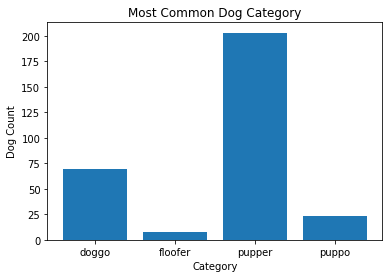

In [84]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [203, 69, 23, 8]

fig,ax = plt.subplots(figsize = (6,4))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

- The most common images of dogs are of a pupper.
- Almost 70% of the images are of pupper.

In [85]:
df_top_retweets = df_ratedogs_copy.sort_values('retweet_count', ascending=False)[['tweet_id', 'dog_type', 'rating_numerator', 'rating_denominator', 'retweet_count']]
df_top_retweets

,tweet_id,dog_type,rating_numerator,rating_denominator,retweet_count
767,744234799360020481,doggo,13.0,10,77495
801,739238157791694849,doggo,13.0,10,57495
396,807106840509214720,None,13.0,10,56467
306,822872901745569793,puppo,13.0,10,43630
58,879415818425184262,None,13.0,10,40468
330,819004803107983360,doggo,14.0,10,37288
398,806629075125202948,None,13.0,10,35325
108,866450705531457537,pupper,13.0,10,32820
1405,678399652199309312,None,12.0,10,31207
1463,676219687039057920,None,10.0,10,30276


- Above are the retweets n descending order in WeRateDogs masterdata.
- The highest number of retweets is 77552 for tweet with tweet_id 744234799360020481.

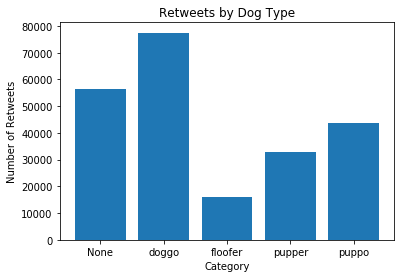

In [86]:
fig,ax = plt.subplots(figsize = (6,4))
ax.bar(df_top_retweets.dog_type, df_top_retweets.retweet_count, width = 0.8)
ax.set_ylabel('Number of Retweets')
ax.set_xlabel('Category')
plt.title("Retweets by Dog Type")
plt.show()

- 'doggo' has most number of retweets.
- 'floofer' has the lowest number of retweets.

Text(0.5,1,'Retweets and favorites Scatter plot')

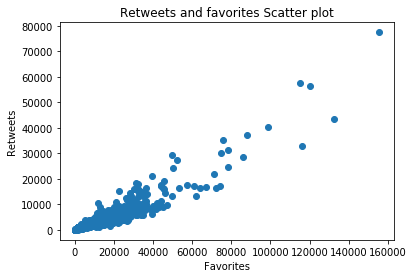

In [87]:
plt.scatter(df_ratedogs_copy['favorite_count'], df_ratedogs_copy['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As expected there is a positive correlation between the number of retweets and likes or favorites.

In [88]:
df_rating = df_ratedogs_copy.sort_values('retweet_count', ascending=False)[['tweet_id', 'dog_type', 'rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count']]
df_rating

,tweet_id,dog_type,rating_numerator,rating_denominator,retweet_count,favorite_count
767,744234799360020481,doggo,13.0,10,77495,155538
801,739238157791694849,doggo,13.0,10,57495,114952
396,807106840509214720,None,13.0,10,56467,120155
306,822872901745569793,puppo,13.0,10,43630,132576
58,879415818425184262,None,13.0,10,40468,98907
330,819004803107983360,doggo,14.0,10,37288,87815
398,806629075125202948,None,13.0,10,35325,75919
108,866450705531457537,pupper,13.0,10,32820,116035
1405,678399652199309312,None,12.0,10,31207,78041
1463,676219687039057920,None,10.0,10,30276,74594


In [89]:
df_rating['rating'] = df_rating['rating_numerator'] / df_rating['rating_denominator']
df_rating.sort_values('rating', ascending=False)

,tweet_id,dog_type,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
720,749981277374128128,None,1776.0,10,2464,5114,177.6
1692,670842764863651840,None,420.0,10,8284,23653,42.0
450,794205286408003585,pupper,14.0,10,3386,9374,1.4
250,832273440279240704,doggo,14.0,10,2344,11371,1.4
629,762035686371364864,None,14.0,10,15617,31979,1.4
1263,685547936038666240,pupper,14.0,10,15501,32694,1.4
203,841439858740625411,None,14.0,10,3658,12553,1.4
49,881536004380872706,pupper,14.0,10,14522,46221,1.4
310,822462944365645825,pupper,14.0,10,14460,28261,1.4
395,807621403335917568,pupper,14.0,10,3691,14817,1.4


In [90]:
df_rating.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,1.967000e+03,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,7.359906e+17,12.172994,10.483986,2447.390442,8242.333503,1.163641
std,6.757335e+16,41.648283,6.857110,4386.376702,12152.479355,4.091689
min,6.660209e+17,0.000000,10.000000,0.000000,0.000000,0.000000
25%,6.758494e+17,10.000000,10.000000,543.500000,1751.000000,1.000000
50%,7.087381e+17,11.000000,10.000000,1185.000000,3689.000000,1.100000
75%,7.880951e+17,12.000000,10.000000,2795.500000,10287.500000,1.200000
max,8.924206e+17,1776.000000,170.000000,77495.000000,155538.000000,177.600000


- The mean rating for dogs is 1.16
- The highest rating is 177.6

In [91]:
df_imagepredict_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


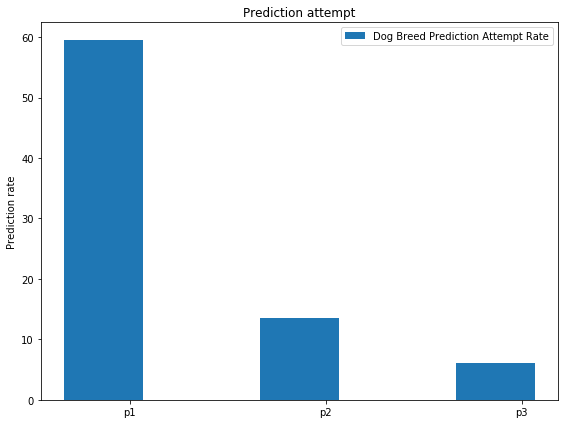

In [92]:
results_predict = [df_imagepredict_copy.p1_conf.mean()*100,df_imagepredict_copy.p2_conf.mean()*100,df_imagepredict_copy.p3_conf.mean()*100]
labels = ['p1', 'p2', 'p3']

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize = (8,6))
rects1 = ax.bar(x - width/3, results_predict, width, label='Dog Breed Prediction Attempt Rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prediction rate')
ax.set_title('Prediction attempt')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

- The above graph shows that p1 has a prediction rate of 0.6. 